In [3]:
import os
import re
import glob
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rc('pdf', fonttype=42)

In [4]:
target_mCG_df = pd.read_csv("final_filtered.DMRs.tsv", sep="\t")

In [5]:
target_mCG_df.shape

(134868, 71)

In [6]:
target_mCG_df.columns = [re.sub("methylation_level_", "", x) for x in target_mCG_df.columns]

In [7]:
target_mCG_df = target_mCG_df.iloc[:, list(range(6))+[-2]+list(range(6,69))+[-1]]

In [59]:
target_mCG_df

,#chr,start,end,number_of_dms,hypermethylated_samples,hypomethylated_samples,celltype,Ctrl,MRSA,MSSA,...,HIV_1,HIV_10,HIV_13,HIV_16,HIV_19,HIV_22,HIV_25,HIV_4,HIV_7,MRSA_12
0,chr1,1035803,1035803,1,Ctrl,MSSA,B-Mem,0.789474,0.444444,0.230769,...,1.000000,NaN,1.00,NaN,NaN,1.00000,NaN,NaN,NaN,NaN
1,chr1,1055152,1055152,1,Ctrl,MSSA,B-Mem,0.740260,0.470588,0.321429,...,1.000000,0.000000,1.00,0.000000,1.000000,1.00000,NaN,1.000000,1.000000,NaN
2,chr1,1080343,1080343,1,MSSA,Ctrl,B-Mem,0.179487,0.571429,0.606061,...,NaN,NaN,0.00,NaN,0.000000,0.50000,NaN,0.000000,0.000000,NaN
3,chr1,1229184,1229184,1,Ctrl,MRSA,B-Mem,0.771429,0.378378,0.727273,...,1.000000,0.600000,1.00,1.000000,0.250000,0.87500,1.000000,0.600000,0.000000,NaN
4,chr1,1554290,1554290,1,Ctrl,MSSA,B-Mem,0.711538,0.708333,0.225806,...,1.000000,NaN,1.00,1.000000,1.000000,0.50000,1.000000,1.000000,0.500000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134863,chrY,15614369,15614369,1,MRSA,Ctrl,Th-Naive,0.117647,0.909091,0.181818,...,0.500000,NaN,NaN,0.000000,0.000000,0.00000,0.000000,0.750000,NaN,NaN
134864,chrY,20348963,20348963,1,Ctrl,MSSA,Th-Naive,0.777778,0.466667,0.318182,...,1.000000,NaN,0.00,1.000000,1.000000,1.00000,NaN,0.666667,1.000000,0.500000
134865,chrY,26651201,26651201,1,Ctrl,MSSA,Th-Naive,0.955556,0.894737,0.333333,...,1.000000,1.000000,1.00,0.666667,NaN,1.00000,1.000000,1.000000,NaN,0.666667
134866,chrY,56848356,56848356,1,Ctrl,NaN,Th-Naive,0.922892,0.866142,0.860987,...,0.972973,0.961538,0.92,0.884615,1.000000,0.90625,0.928571,0.965517,0.923077,1.000000


In [9]:
metadata = pd.read_csv("/gale/netapp/DoD/wenliang/projects/02.MRSA/20.clusterWithCtrl/01.clustering/cell2cluster.csv")

/tmp/ipykernel_1892569/2257777447.py:1: DtypeWarning: Columns (1,2,42,43,44,45,50,51,52,53,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv("/gale/netapp/DoD/wenliang/projects/02.MRSA/20.clusterWithCtrl/01.clustering/cell2cluster.csv")


In [14]:
id2group = dict(zip(metadata['sampleID'], metadata['Cohort']))

In [77]:
target_mCG_df.columns = [f'{id2group[x]}_{x}' if x in id2group else x for x in target_mCG_df.columns]

In [80]:
target_mCG_df.to_csv("final_filtered.DMRs.tsv", index=False)

In [65]:
sample_data = target_mCG_df.sample(50000)

In [66]:
sample_data.columns = [f'{id2group[x]}_{x}' if x in id2group else x for x in sample_data.columns]

/gale/netapp/DoD/wenliang/bin/miniconda3_4.9.2/envs/echo/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


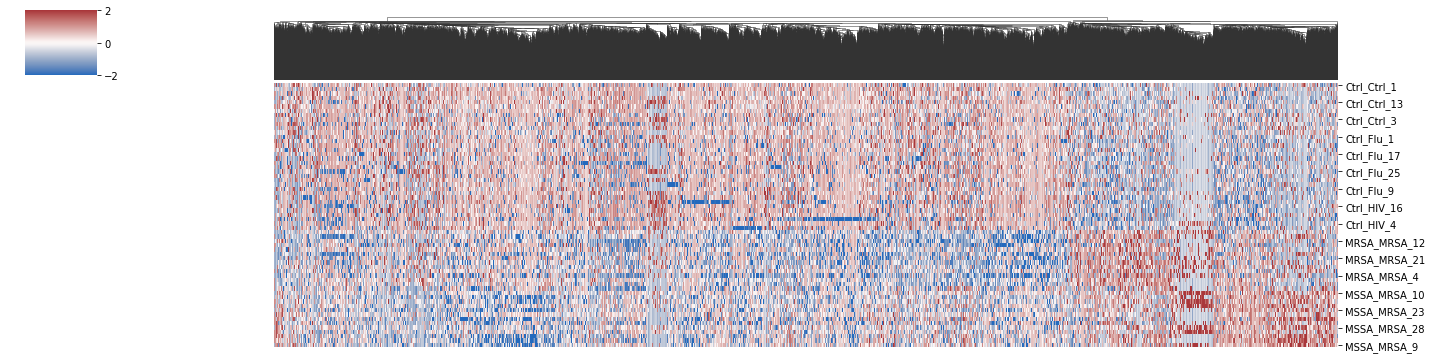

In [67]:
cluster_grid = sns.clustermap(data=sample_data.iloc[:, 10:].astype(float).fillna(0).T.sort_index(), figsize=(20, 5), xticklabels=False, \
                              row_cluster=False, col_cluster=True, z_score=1, cmap='vlag', vmin=-2, vmax=2)

In [68]:
zscore_order = cluster_grid.dendrogram_col.reordered_ind

In [69]:
plot_merge_df = sample_data.iloc[:,10:].T

In [70]:
zscore_df = (plot_merge_df - plot_merge_df.mean())/plot_merge_df.std(ddof=0)

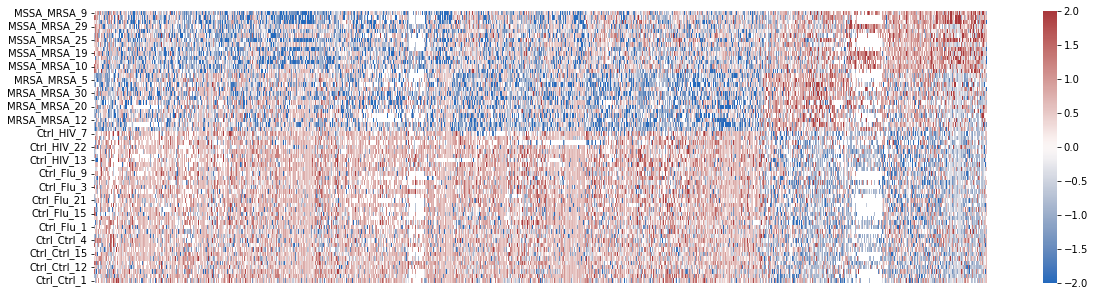

In [71]:
fig, ax = plt.subplots(1,1, figsize=(20, 5))
sns.heatmap(zscore_df.iloc[:,zscore_order].astype(float).sort_index(ascending=False), cmap='vlag', ax=ax, \
               xticklabels=False, vmin=-2, vmax=2, rasterized=True)
plt.savefig("MRSA_DMLs.heatmap.pdf")

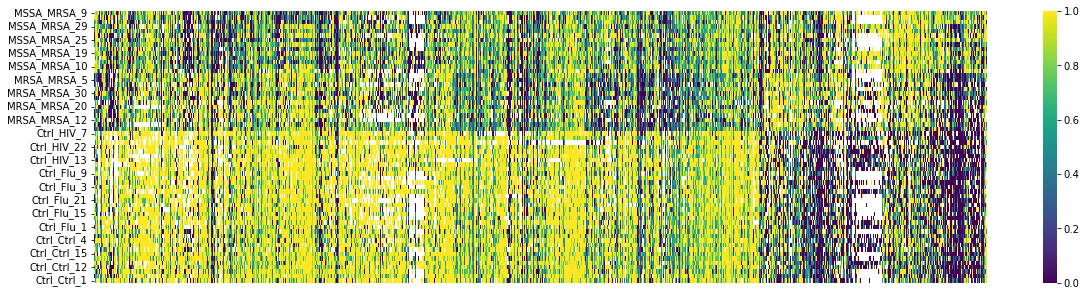

In [72]:
fig, ax = plt.subplots(1,1, figsize=(20, 5))
sns.heatmap(plot_merge_df.iloc[:, zscore_order].astype(float).sort_index(ascending=False), cmap='viridis', ax=ax, \
               xticklabels=False, rasterized=True)
plt.savefig("MRSA_DMLs.mCG.heatmap.pdf")

In [75]:
target_mCG_df.columns = [f'{id2group[x]}_{x}' if x in id2group else x for x in target_mCG_df.columns]
dmr_corr = target_mCG_df.iloc[:, 10:].corr()

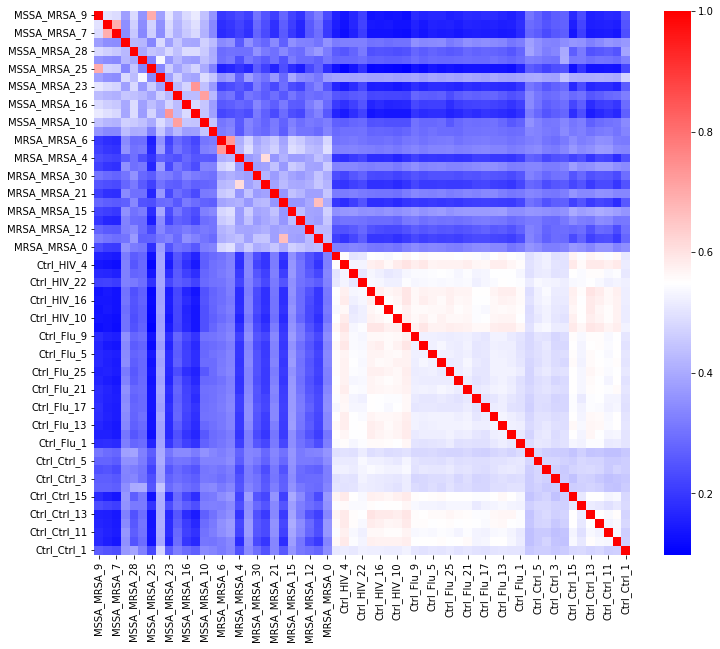

In [76]:
fig, ax = plt.subplots(1,1,figsize=(12, 10))
sns.heatmap(dmr_corr.sort_index(ascending=False).sort_index(ascending=False, axis=1), cmap='bwr')
plt.savefig("MRSA_DMLs.corr.pdf")